# Zbiór IMDB

Pobranie zbioru IMDB. Ograniczamy się do 10000 słów. 

In [ ]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

**deklaracja hiperparametrów:**

In [ ]:
_learningRate = 0.01
_epochs = 70
_batchSize = 678

Wielkości zbiorów treningowych i testowych ustalamy na 10000:

In [ ]:
data = train_data[:1000]
labels = train_labels[:1000]

In [ ]:
data.shape,labels.shape

((1000,), (1000,))

Zapisujemy recenzje w macierzy binarnej:

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Jeszcze ustalenie typu wartości oczekiwanych:

In [ ]:
y_train = np.asarray(labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
y_train[0]

1.0

Z częsci danych testowych tworzymy **dane walidacyjne**:

In [ ]:
x_val = x_test[:5000]
y_val = y_test[:5000]

Definiujemy model:

In [ ]:
import keras
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Optymalizator i kompilacja modelu:

In [ ]:
opt=keras.optimizers.RMSprop(lr = _learningRate)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

Trenujemy model:

In [ ]:
history = model.fit(x_train,y_train, epochs = _epochs, batch_size = _batchSize, validation_data=(x_val, y_val))

Epoch 1/70
2/2 [==============================] - 1s 528ms/step - loss: 0.6800 - accuracy: 0.5338 - val_loss: 0.7725 - val_accuracy: 0.5258
Epoch 2/70
2/2 [==============================] - 0s 138ms/step - loss: 1.2661 - accuracy: 0.6283 - val_loss: 0.5336 - val_accuracy: 0.7676
Epoch 3/70
2/2 [==============================] - 0s 343ms/step - loss: 0.5510 - accuracy: 0.8300 - val_loss: 1.4473 - val_accuracy: 0.5168
Epoch 4/70
2/2 [==============================] - 0s 131ms/step - loss: 0.8865 - accuracy: 0.6364 - val_loss: 0.4370 - val_accuracy: 0.8138
Epoch 5/70
2/2 [==============================] - 0s 132ms/step - loss: 0.1648 - accuracy: 0.9758 - val_loss: 0.4283 - val_accuracy: 0.8158
Epoch 6/70
2/2 [==============================] - 0s 132ms/step - loss: 0.0949 - accuracy: 0.9922 - val_loss: 0.4196 - val_accuracy: 0.8206
Epoch 7/70
2/2 [==============================] - 0s 133ms/step - loss: 0.0618 - accuracy: 0.9970 - val_loss: 0.4263 - val_accuracy: 0.8226
Epoch 8/70
2/2 [====

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Błąd treningowy i walidacyjny:

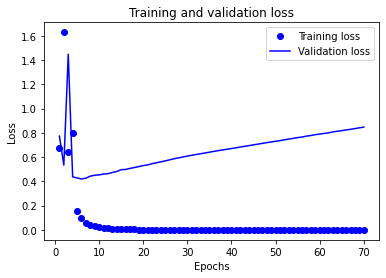

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
loss_values[:10]

[0.6723741888999939,
 1.6286338567733765,
 0.6456830501556396,
 0.7991800308227539,
 0.15996050834655762,
 0.09434229880571365,
 0.06011440232396126,
 0.04125693440437317,
 0.02899915724992752,
 0.021095264703035355]

# **Regularyzacja** - metoda 1

Zwiększamy zbiór treningowy z **1000** do **250000** (20% to zbiór walidacyjny)

In [ ]:
data = train_data[:25000]
labels = train_labels[:25000]

In [ ]:
x_train = vectorize_sequences(data)
y_train = np.asarray(labels).astype('float32')

Model taki sam:

In [ ]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

opt=keras.optimizers.RMSprop(lr = _learningRate)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

Pętla ucząca:

In [ ]:
history = model.fit(x_train,y_train, epochs = _epochs, batch_size = _batchSize, validation_data=(x_val, y_val))

Epoch 1/70
37/37 [==============================] - 1s 23ms/step - loss: 0.7086 - accuracy: 0.6624 - val_loss: 0.3199 - val_accuracy: 0.8646
Epoch 2/70
37/37 [==============================] - 1s 18ms/step - loss: 0.2633 - accuracy: 0.8921 - val_loss: 0.2793 - val_accuracy: 0.8836
Epoch 3/70
37/37 [==============================] - 1s 18ms/step - loss: 0.1897 - accuracy: 0.9239 - val_loss: 0.3161 - val_accuracy: 0.8850
Epoch 4/70
37/37 [==============================] - 1s 18ms/step - loss: 0.1613 - accuracy: 0.9343 - val_loss: 0.3560 - val_accuracy: 0.8798
Epoch 5/70
37/37 [==============================] - 1s 18ms/step - loss: 0.1459 - accuracy: 0.9420 - val_loss: 0.4372 - val_accuracy: 0.8704
Epoch 6/70
37/37 [==============================] - 1s 18ms/step - loss: 0.0820 - accuracy: 0.9647 - val_loss: 0.4346 - val_accuracy: 0.8742
Epoch 7/70
37/37 [==============================] - 1s 18ms/step - loss: 0.0532 - accuracy: 0.9767 - val_loss: 1.1266 - val_accuracy: 0.7724
Epoch 8/70
37

Błąd treningowy i walidacyjny:

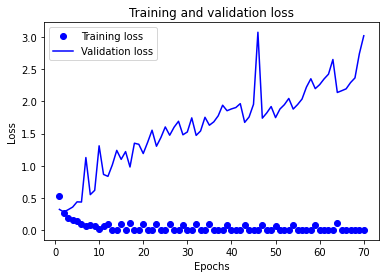

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
loss_values[:10]

[0.5275418162345886,
 0.265470951795578,
 0.19117805361747742,
 0.15534910559654236,
 0.13357385993003845,
 0.09678284823894501,
 0.06505342572927475,
 0.07828008383512497,
 0.06671250611543655,
 0.013837320730090141]

# **Regularyzacja** - metoda 2

Zmniejszamy **wielkość modelu**:

In [ ]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

opt=keras.optimizers.RMSprop(lr = _learningRate)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

Pętla ucząca:

In [ ]:
history = model.fit(x_train,y_train, epochs = _epochs, batch_size = _batchSize, validation_data=(x_val, y_val))

Epoch 1/70
37/37 [==============================] - 1s 22ms/step - loss: 0.5855 - accuracy: 0.6914 - val_loss: 0.3445 - val_accuracy: 0.8642
Epoch 2/70
37/37 [==============================] - 1s 18ms/step - loss: 0.2586 - accuracy: 0.9001 - val_loss: 0.2788 - val_accuracy: 0.8872
Epoch 3/70
37/37 [==============================] - 1s 24ms/step - loss: 0.1949 - accuracy: 0.9221 - val_loss: 0.2865 - val_accuracy: 0.8826
Epoch 4/70
37/37 [==============================] - 1s 18ms/step - loss: 0.1499 - accuracy: 0.9468 - val_loss: 0.3114 - val_accuracy: 0.8762
Epoch 5/70
37/37 [==============================] - 1s 18ms/step - loss: 0.1361 - accuracy: 0.9477 - val_loss: 0.3780 - val_accuracy: 0.8760
Epoch 6/70
37/37 [==============================] - 1s 18ms/step - loss: 0.1105 - accuracy: 0.9598 - val_loss: 0.3816 - val_accuracy: 0.8688
Epoch 7/70
37/37 [==============================] - 1s 18ms/step - loss: 0.1023 - accuracy: 0.9622 - val_loss: 0.4581 - val_accuracy: 0.8568
Epoch 8/70
37

Błąd treningowy i walidacyjny:

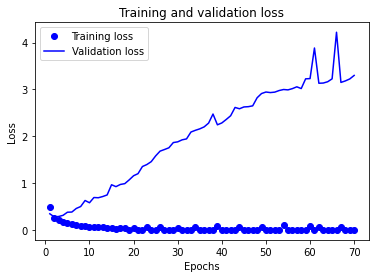

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Spróbujmy teraz znacznie zwiększyć **wielkość modelu**:

In [ ]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

opt=keras.optimizers.RMSprop(lr = _learningRate)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

Pętla ucząca:

In [ ]:
history = model.fit(x_train,y_train, epochs = _epochs, batch_size = _batchSize, validation_data=(x_val, y_val))

Epoch 1/70
37/37 [==============================] - 2s 29ms/step - loss: 18.4357 - accuracy: 0.6457 - val_loss: 0.5177 - val_accuracy: 0.7552
Epoch 2/70
37/37 [==============================] - 1s 22ms/step - loss: 0.5754 - accuracy: 0.7929 - val_loss: 0.3503 - val_accuracy: 0.8438
Epoch 3/70
37/37 [==============================] - 1s 23ms/step - loss: 0.2550 - accuracy: 0.8934 - val_loss: 0.7260 - val_accuracy: 0.6846
Epoch 4/70
37/37 [==============================] - 1s 22ms/step - loss: 0.2361 - accuracy: 0.9073 - val_loss: 0.2890 - val_accuracy: 0.8810
Epoch 5/70
37/37 [==============================] - 1s 21ms/step - loss: 0.1612 - accuracy: 0.9367 - val_loss: 0.5220 - val_accuracy: 0.8396
Epoch 6/70
37/37 [==============================] - 1s 22ms/step - loss: 0.1256 - accuracy: 0.9530 - val_loss: 0.8459 - val_accuracy: 0.8140
Epoch 7/70
37/37 [==============================] - 1s 22ms/step - loss: 0.1164 - accuracy: 0.9564 - val_loss: 0.4448 - val_accuracy: 0.8774
Epoch 8/70
3

Błąd treningowy i walidacyjny:

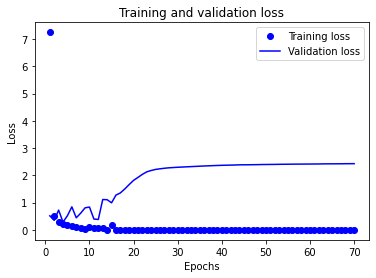

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Regularyzacja** - metoda 3

Import **normy L2**:

In [ ]:
from keras.regularizers import l2

Danie **regularyzacji L2** do warstw:

In [ ]:

model = models.Sequential()
model.add(layers.Dense(32, kernel_regularizer=l2(0.01), activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, kernel_regularizer=l2(0.01), activation='relu'))
model.add(layers.Dense(1, kernel_regularizer=l2(0.01), activation='sigmoid'))

opt=keras.optimizers.RMSprop(lr = _learningRate)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

Pętla ucząca:

In [ ]:
history = model.fit(x_train,y_train, epochs = _epochs, batch_size = _batchSize, validation_data=(x_val, y_val))

Epoch 1/70
37/37 [==============================] - 1s 22ms/step - loss: 1.1255 - accuracy: 0.5687 - val_loss: 0.7147 - val_accuracy: 0.7414
Epoch 2/70
37/37 [==============================] - 1s 18ms/step - loss: 0.7134 - accuracy: 0.7393 - val_loss: 0.6860 - val_accuracy: 0.7782
Epoch 3/70
37/37 [==============================] - 1s 19ms/step - loss: 0.6745 - accuracy: 0.7840 - val_loss: 0.6080 - val_accuracy: 0.8284
Epoch 4/70
37/37 [==============================] - 1s 19ms/step - loss: 0.6696 - accuracy: 0.7949 - val_loss: 0.6246 - val_accuracy: 0.8246
Epoch 5/70
37/37 [==============================] - 1s 19ms/step - loss: 0.6575 - accuracy: 0.8002 - val_loss: 0.7301 - val_accuracy: 0.7564
Epoch 6/70
37/37 [==============================] - 1s 25ms/step - loss: 0.6441 - accuracy: 0.8199 - val_loss: 0.6683 - val_accuracy: 0.7910
Epoch 7/70
37/37 [==============================] - 1s 18ms/step - loss: 0.6516 - accuracy: 0.8066 - val_loss: 0.6188 - val_accuracy: 0.8244
Epoch 8/70
37

Błąd treningowy i walidacyjny:

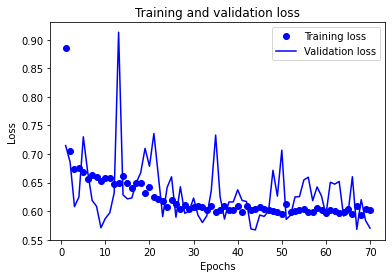

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Regularyzacja** - metoda 4

Import **warstwy Dropout**:

In [ ]:
from keras.layers import Dropout

Danie warstw **Dropout**:

In [ ]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(Dropout(0.4))
model.add(layers.Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(layers.Dense(1, activation='sigmoid'))

opt=keras.optimizers.RMSprop(lr = _learningRate)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

Pętla ucząca:

In [ ]:
history = model.fit(x_train,y_train, epochs = _epochs, batch_size = _batchSize, validation_data=(x_val, y_val))

Epoch 1/70
37/37 [==============================] - 1s 23ms/step - loss: 0.6746 - accuracy: 0.6387 - val_loss: 0.3633 - val_accuracy: 0.8482
Epoch 2/70
37/37 [==============================] - 1s 19ms/step - loss: 0.3487 - accuracy: 0.8588 - val_loss: 0.3002 - val_accuracy: 0.8792
Epoch 3/70
37/37 [==============================] - 1s 18ms/step - loss: 0.2605 - accuracy: 0.8977 - val_loss: 0.3365 - val_accuracy: 0.8622
Epoch 4/70
37/37 [==============================] - 1s 19ms/step - loss: 0.2586 - accuracy: 0.9055 - val_loss: 0.3376 - val_accuracy: 0.8642
Epoch 5/70
37/37 [==============================] - 1s 19ms/step - loss: 0.1798 - accuracy: 0.9306 - val_loss: 0.3385 - val_accuracy: 0.8796
Epoch 6/70
37/37 [==============================] - 1s 19ms/step - loss: 0.1398 - accuracy: 0.9460 - val_loss: 0.3981 - val_accuracy: 0.8652
Epoch 7/70
37/37 [==============================] - 1s 19ms/step - loss: 0.1214 - accuracy: 0.9547 - val_loss: 0.6045 - val_accuracy: 0.8358
Epoch 8/70
37

Błąd treningowy i walidacyjny:

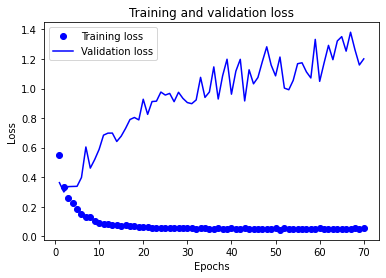

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()